<a href="https://colab.research.google.com/github/AndreassOlsson/faceID/blob/main/extracting_faces_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 - The Data

In [ ]:
# !pip install fastai==2.4
from fastai.vision.all import *
import tarfile

### Unzipping, untaring & extracting all image files

In [ ]:
path = "drive/MyDrive/Andreas Olsson/FastAI/faceID/data/lfw-dfun.tgz" 
# path = "drive/MyDrive/Andreas Olsson/FastAI/faceID/data/lfw_sub.tgz" 
tar = tarfile.open(path)
tarfile.open(path, 'r:gz').extractall('dfun')

In [ ]:
# path_orig = Path('dataset/lfw-deepfunneled/')
path_orig = Path('dfun/lfw-deepfunneled/')

people = list(path_orig.ls())
paths = list(set(filter(lambda folder: len(folder.ls())>1, people)))

In [ ]:
import itertools

def f(path):
  return get_image_files(path)

items = list(map(f, paths))
items = L(list(itertools.chain.from_iterable([[j for j in i] for i in items])))

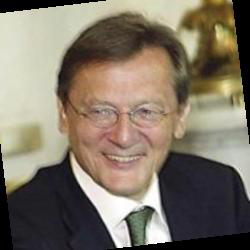

In [ ]:
Image.open(items[0])

## Extract faces

In [ ]:
!pip install facenet-pytorch
import torchvision
import torchvision.transforms as transforms
from facenet_pytorch import MTCNN

In [ ]:
mtcnn = MTCNN(select_largest=False, post_process=False, margin=0, device='cpu')

In [ ]:
def extract_faces(imPaths):
  ims = [Image.open(im) for im in imPaths]
  faces = mtcnn(ims)
  if all(torch.is_tensor(face) for face in faces):
    return [to_image((face*-1)) for face in faces if not isinstance(face, int)]

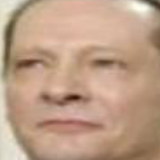

In [ ]:
extract_faces([items[12]])[0]

## Create new dataset with extracted faces

In [ ]:
def label_func(fn): return parent_label(fn)
labels = list(set(items.map(label_func)))

In [ ]:
lbl2files = {l: [f for f in items if label_func(f) == l] for l in labels}

In [ ]:
for k,v in lbl2files.items():
  dir = Path(f'dfun_e/{k}/')
  os.makedirs(dir)

In [ ]:
for k,v in lbl2files.items():
  dir = Path(f'dfun_e/{k}/')
  if len(v) > 1:
    ims = extract_faces(v)
    if not ims is None:
      for i, im in enumerate(ims):
        im.save(f'{dir}/{k}_{i}.jpg')

/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_boxes = np.array(selected_boxes)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:446: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_points = np.array(selected_points)


In [ ]:
def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

In [ ]:
make_tarfile('/content/drive/MyDrive/Andreas Olsson/FastAI/faceID/data/lfw-dfun-extracted-nm.tgz', 'dfun_e')

## Test the extracted tar file

In [ ]:
path = '/content/drive/MyDrive/Andreas Olsson/FastAI/faceID/lfw-sub-extracted.tgz'
tar = tarfile.open(path)
tarfile.open(path, 'r:gz').extractall('subT')

In [ ]:
# path_orig = Path('/content/lsw_subset_extracted/test/extraced_faces')
path_orig = Path('/content/subT/lfw-sub-extracted')

people = list(path_orig.ls())
paths = list(set(filter(lambda folder: len(folder.ls())>1, people)))
len(people)

133

In [ ]:
import itertools

def f(path):
  return get_image_files(path)

items = list(map(f, paths))
items = L(list(itertools.chain.from_iterable([[j for j in i] for i in items])))

In [ ]:
len(items)